In [1]:
import depoSimulator

import numpy as np
import matplotlib.pyplot as plt


0.2199993801495016


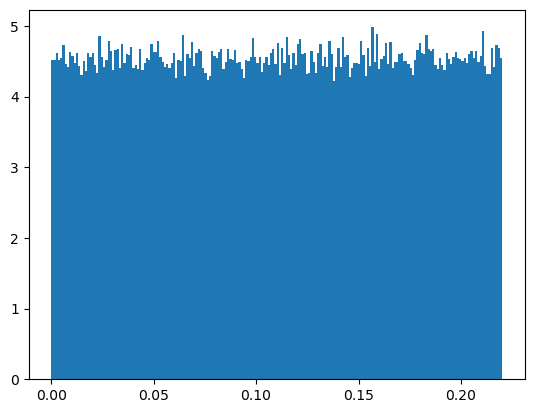

In [2]:
a = np.random.rand(int(2e5))*0.22
nptest = np.histogram(a, bins=200, range=[0, 0.22])
print(a.max())
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)

distGen = dist[0]*3e3

distNorm = distGen*dist[1][1:]*2*np.pi

(1896150,)


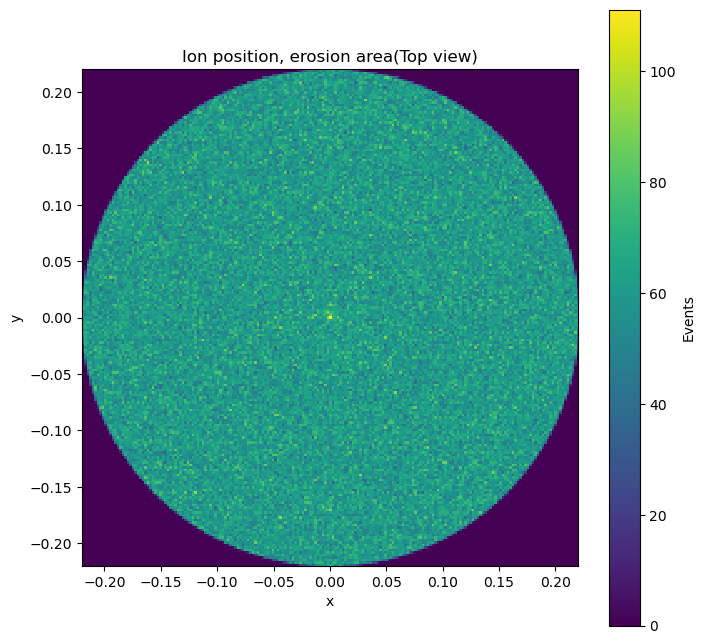

In [3]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(distNorm[0][i])
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(distNorm[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[200-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [2]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[left_side:200-left_side, left_side:200-left_side, 0:height] = 10
# film[left_side:200-left_side, left_side:200-left_side, 0:height] = 10

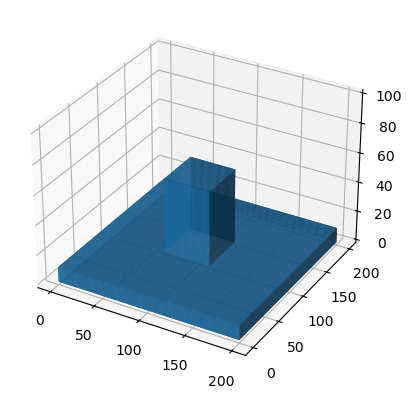

In [6]:
indice_wall = np.array(film == 10)
# in_depo = np.logical_and(result > 0, result < 1)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
# ax.voxels(in_depo)

plt.show()

In [5]:
test = depoSimulator.depo(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=[0,0], film=film)

In [6]:
deposit = test.runDepoition(3, 125, N = gen_dist_x.shape[0], weight=1)

running: 100%|██████████████████████████████████████████████████████| 100/100 [02:19<00:00, 1.39s/B]


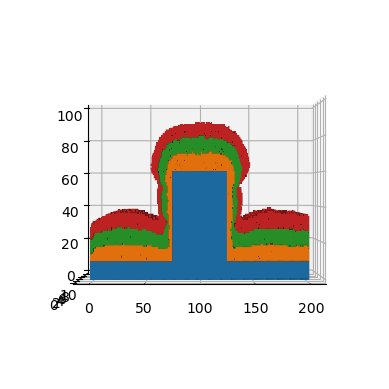

In [9]:
openWidth = 95

indice_wall = np.array(film[:, openWidth:200-openWidth, :] == 10)
# in_depo = np.logical_and(result[:, openWidth:200-openWidth, :] > 0, result[:, openWidth:200-openWidth, :] != 10)
in_depo = np.array(deposit[:, openWidth:200-openWidth, :] == 20)
# in_depo2 = np.logical_and(result2[:, openWidth:200-openWidth, :] > 0, result2[:, openWidth:200-openWidth, :] != 10, result2[:, openWidth:200-openWidth, :] != 20)
in_depo2 = np.array(deposit[:, openWidth:200-openWidth, :] == 40)
in_depo3 = np.array(deposit[:, openWidth:200-openWidth, :] == 60)
in_depo4 = np.array(deposit[:, openWidth:200-openWidth, :] == 80)
in_depo5 = np.array(deposit[:, openWidth:200-openWidth, :] == 100)
in_depo6 = np.array(deposit[:, openWidth:200-openWidth, :] == 120)
in_depo7 = np.array(deposit[:, openWidth:200-openWidth, :] == 140)
in_depo8 = np.array(deposit[:, openWidth:200-openWidth, :] == 160)
# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(in_depo5)
ax.voxels(in_depo6)
ax.voxels(in_depo7)
ax.voxels(in_depo8)
ax.view_init(elev=0, azim=-90, roll=0)

In [7]:
np.savez('depoData0507.npz', deposit)

In [3]:
deposit = np.load('./depoData0507.npz')['arr_0']
print(deposit)

[[[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 ...

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  

In [4]:
import etchingSimulator_reflect_0507

In [5]:
etchfilm = np.zeros((200, 200, 100))

deposit_etch = deposit == 40
a = np.where(deposit_etch == True)
deposit_etch_10 = deposit == 10
b = np.where(deposit_etch_10 == True)
deposit_etch_20 = deposit == 20
c = np.where(deposit_etch_20 == True)

deposit_etch_60 = deposit == 60
d = np.where(deposit_etch_60 == True)

etchfilm[a] = -10
etchfilm[b] = -10
etchfilm[c] = -10
etchfilm[d] = -10

In [6]:
etchfilm[90:110, 100, :30]

array([[-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., 

In [7]:
testEtch = etchingSimulator_reflect_0507.etching(param = [1.6, -0.7], TS = 0.11, N = 120000, sub_xy=[0,0], film=etchfilm)

In [8]:
etching = testEtch.runEtching(step=1, tstep=1e-3, seed=125, N = 120000, weight=1e-2)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

(0,)
(0,)
(0,)
(0,)
(0,)
(5,)
(12,)
(46,)
(69,)
(86,)


running:   1%|▌                                                   | 1.00/100 [02:40<4:24:32, 160s/B]

(143,)
(164,)
(181,)
(245,)
(256,)
(318,)
(303,)
(340,)
(345,)
(373,)


running:   2%|█                                                   | 2.00/100 [05:19<4:20:34, 160s/B]

(405,)
(363,)
(421,)
(388,)
(397,)
(415,)
(405,)
(412,)
(433,)
(357,)


running:   3%|█▌                                                  | 3.00/100 [07:57<4:17:06, 159s/B]

(397,)
(375,)
(389,)
(387,)
(366,)
(321,)
(363,)
(312,)
(301,)
(352,)


running:   4%|██                                                  | 4.00/100 [10:38<4:15:36, 160s/B]

(309,)
(322,)
(282,)
(299,)
(292,)
(285,)
(281,)
(278,)
(271,)
(252,)


running:   5%|██▌                                                 | 5.00/100 [13:19<4:13:33, 160s/B]

(262,)
(240,)
(234,)
(216,)
(255,)
(246,)
(255,)
(257,)
(247,)
(242,)


running:   6%|███                                                 | 6.00/100 [15:56<4:09:21, 159s/B]

(273,)
(265,)
(235,)
(250,)
(256,)
(284,)
(268,)
(299,)
(289,)
(311,)


running:   7%|███▋                                                | 7.00/100 [18:33<4:05:20, 158s/B]

(330,)
(325,)
(317,)
(331,)
(351,)
(331,)
(373,)
(343,)
(352,)
(391,)


running:   8%|████▏                                               | 8.00/100 [21:08<4:01:23, 157s/B]

(374,)
(388,)
(417,)
(367,)
(399,)
(366,)
(407,)
(387,)
(452,)
(365,)


running:   9%|████▋                                               | 9.00/100 [23:44<3:58:00, 157s/B]

(419,)
(447,)
(407,)
(407,)
(417,)
(437,)
(423,)
(434,)
(418,)
(434,)


running:  10%|█████▏                                              | 10.0/100 [26:21<3:55:20, 157s/B]

(450,)
(413,)
(442,)
(417,)
(423,)
(405,)
(428,)
(424,)
(411,)
(412,)


running:  11%|█████▋                                              | 11.0/100 [28:57<3:52:19, 157s/B]

(392,)
(399,)
(396,)
(397,)
(422,)
(408,)
(409,)
(366,)
(374,)
(362,)


running:  12%|██████▏                                             | 12.0/100 [31:34<3:50:03, 157s/B]

(411,)
(345,)
(364,)
(381,)
(342,)
(375,)
(376,)
(348,)
(332,)
(358,)


running:  13%|██████▊                                             | 13.0/100 [34:12<3:47:38, 157s/B]

(352,)
(357,)
(316,)
(297,)
(327,)
(329,)
(310,)
(332,)
(269,)
(332,)


running:  14%|███████▎                                            | 14.0/100 [36:49<3:45:15, 157s/B]

(284,)
(302,)
(275,)
(309,)
(274,)
(282,)
(288,)
(302,)
(256,)
(263,)


running:  15%|███████▊                                            | 15.0/100 [39:26<3:42:23, 157s/B]

(254,)
(218,)
(272,)
(233,)
(237,)
(243,)
(250,)
(228,)
(244,)
(210,)


running:  16%|████████▎                                           | 16.0/100 [42:02<3:39:20, 157s/B]

(196,)
(216,)
(217,)
(206,)
(241,)
(185,)
(190,)
(181,)
(200,)
(202,)


running:  17%|████████▊                                           | 17.0/100 [44:40<3:37:15, 157s/B]

(194,)
(187,)
(184,)
(204,)
(192,)
(181,)
(198,)
(143,)
(180,)
(168,)


running:  18%|█████████▎                                          | 18.0/100 [47:19<3:35:38, 158s/B]

(177,)
(169,)
(170,)
(178,)
(148,)
(161,)
(147,)
(140,)
(140,)
(140,)


running:  19%|█████████▉                                          | 19.0/100 [49:56<3:32:46, 158s/B]

(138,)
(127,)
(153,)
(156,)
(134,)
(131,)
(130,)
(128,)
(118,)
(114,)


running:  20%|██████████▍                                         | 20.0/100 [52:32<3:29:28, 157s/B]

(122,)
(101,)
(96,)
(104,)
(117,)
(102,)
(117,)
(96,)
(96,)
(114,)


running:  21%|██████████▉                                         | 21.0/100 [55:08<3:26:23, 157s/B]

(95,)
(95,)
(96,)
(113,)
(88,)
(89,)
(92,)
(98,)
(93,)
(97,)


running:  22%|███████████▍                                        | 22.0/100 [57:44<3:23:25, 156s/B]

(85,)
(67,)
(70,)
(88,)
(84,)
(72,)
(89,)
(75,)
(76,)
(64,)


running:  23%|███████████▌                                      | 23.0/100 [1:00:19<3:20:25, 156s/B]

(66,)
(75,)
(70,)
(69,)
(73,)
(65,)
(73,)
(74,)
(70,)
(75,)


running:  24%|████████████                                      | 24.0/100 [1:02:56<3:17:56, 156s/B]

(56,)
(59,)
(47,)
(46,)
(61,)
(52,)
(59,)
(50,)
(38,)
(45,)


running:  25%|████████████▌                                     | 25.0/100 [1:05:34<3:15:56, 157s/B]

(48,)
(55,)
(59,)
(62,)
(44,)
(51,)
(54,)
(59,)
(55,)
(56,)


running:  26%|█████████████                                     | 26.0/100 [1:08:11<3:13:28, 157s/B]

(45,)
(44,)
(48,)
(53,)
(29,)
(35,)
(38,)
(37,)
(49,)
(46,)


running:  27%|█████████████▌                                    | 27.0/100 [1:10:49<3:11:11, 157s/B]

(44,)
(43,)
(34,)
(44,)
(34,)
(40,)
(34,)
(51,)
(42,)
(37,)


running:  28%|██████████████                                    | 28.0/100 [1:13:28<3:09:28, 158s/B]

(40,)
(26,)
(24,)
(19,)
(43,)
(30,)
(40,)
(34,)
(27,)
(26,)


running:  29%|██████████████▍                                   | 29.0/100 [1:16:07<3:07:07, 158s/B]

(28,)
(43,)
(27,)
(31,)
(35,)
(35,)
(33,)
(26,)
(27,)
(22,)


running:  30%|███████████████                                   | 30.0/100 [1:18:43<3:03:34, 157s/B]

(23,)
(27,)
(25,)
(35,)
(38,)
(34,)
(38,)
(39,)
(19,)
(38,)


running:  31%|███████████████▌                                  | 31.0/100 [1:21:18<3:00:17, 157s/B]

(27,)
(22,)
(29,)
(19,)
(25,)
(19,)
(29,)
(13,)
(18,)
(21,)


running:  32%|████████████████                                  | 32.0/100 [1:23:54<2:57:14, 156s/B]

(16,)
(21,)
(30,)
(25,)
(20,)
(15,)
(23,)
(20,)
(19,)
(17,)


running:  33%|████████████████▌                                 | 33.0/100 [1:26:29<2:54:19, 156s/B]

(26,)
(23,)
(17,)
(23,)
(15,)
(15,)
(21,)
(20,)
(16,)
(16,)


running:  34%|█████████████████                                 | 34.0/100 [1:29:08<2:52:45, 157s/B]

(13,)
(16,)
(12,)
(12,)
(16,)
(17,)
(22,)
(19,)
(13,)
(11,)


running:  35%|█████████████████▌                                | 35.0/100 [1:31:48<2:50:52, 158s/B]

(16,)
(13,)
(13,)
(17,)
(18,)
(13,)
(11,)
(19,)
(17,)
(15,)


running:  36%|██████████████████                                | 36.0/100 [1:34:28<2:48:59, 158s/B]

(19,)
(13,)
(17,)
(14,)
(5,)
(23,)
(8,)
(13,)
(12,)
(11,)


running:  37%|██████████████████▌                               | 37.0/100 [1:37:08<2:46:51, 159s/B]

(15,)
(12,)
(10,)
(10,)
(17,)
(11,)
(11,)
(7,)
(9,)
(8,)


running:  38%|███████████████████                               | 38.0/100 [1:39:48<2:44:30, 159s/B]

(14,)
(11,)
(6,)
(7,)
(14,)
(7,)
(9,)
(18,)
(14,)
(10,)


running:  39%|███████████████████▌                              | 39.0/100 [1:42:26<2:41:34, 159s/B]

(12,)
(9,)
(6,)
(13,)
(5,)
(1,)
(11,)
(8,)
(6,)
(14,)


running:  40%|████████████████████                              | 40.0/100 [1:45:02<2:38:09, 158s/B]

(11,)
(9,)
(12,)
(7,)
(5,)
(10,)
(14,)
(3,)
(3,)
(10,)


running:  41%|████████████████████▌                             | 41.0/100 [1:47:38<2:34:57, 158s/B]

(5,)
(6,)
(5,)
(7,)
(7,)
(13,)
(7,)
(5,)
(4,)
(9,)


running:  42%|█████████████████████                             | 42.0/100 [1:50:14<2:31:36, 157s/B]

(2,)
(5,)
(10,)
(9,)
(10,)
(9,)
(8,)
(1,)
(12,)
(7,)


running:  43%|█████████████████████▌                            | 43.0/100 [1:52:51<2:29:08, 157s/B]

(3,)
(6,)
(7,)
(5,)
(9,)
(9,)
(13,)
(4,)
(4,)
(6,)


running:  44%|██████████████████████                            | 44.0/100 [1:55:27<2:26:13, 157s/B]

(9,)
(6,)
(3,)
(6,)
(8,)
(4,)
(7,)
(8,)
(1,)
(5,)


running:  45%|██████████████████████▌                           | 45.0/100 [1:58:02<2:23:11, 156s/B]

(4,)
(5,)
(4,)
(5,)
(2,)
(6,)
(4,)
(5,)
(7,)
(3,)


running:  46%|███████████████████████                           | 46.0/100 [2:00:38<2:20:25, 156s/B]

(10,)
(7,)
(3,)
(3,)
(5,)
(6,)
(7,)
(3,)
(5,)
(5,)


running:  47%|███████████████████████▌                          | 47.0/100 [2:03:15<2:18:11, 156s/B]

(7,)
(6,)
(4,)
(7,)
(6,)
(8,)
(4,)
(3,)
(3,)
(5,)


running:  48%|████████████████████████                          | 48.0/100 [2:05:54<2:16:14, 157s/B]

(6,)
(0,)
(3,)
(5,)
(2,)
(2,)
(1,)
(5,)
(1,)
(1,)


running:  49%|████████████████████████▌                         | 49.0/100 [2:08:30<2:13:25, 157s/B]

(4,)
(3,)
(1,)
(0,)
(3,)
(4,)
(1,)
(2,)
(5,)
(3,)


running:  50%|█████████████████████████                         | 50.0/100 [2:11:08<2:10:51, 157s/B]

(1,)
(7,)
(1,)
(3,)
(5,)
(3,)
(1,)
(3,)
(3,)
(2,)


running:  51%|█████████████████████████▌                        | 51.0/100 [2:13:45<2:08:17, 157s/B]

(3,)
(6,)
(5,)
(3,)
(1,)
(1,)
(3,)
(1,)
(3,)
(0,)


running:  52%|██████████████████████████                        | 52.0/100 [2:16:22<2:05:43, 157s/B]

(2,)
(4,)
(1,)
(1,)
(1,)
(3,)
(1,)
(3,)
(1,)
(5,)


running:  53%|██████████████████████████▌                       | 53.0/100 [2:18:58<2:02:50, 157s/B]

(5,)
(1,)
(1,)
(3,)
(1,)
(1,)
(5,)
(2,)
(1,)
(3,)


running:  54%|███████████████████████████                       | 54.0/100 [2:21:34<2:00:05, 157s/B]

(3,)
(2,)
(1,)
(2,)
(2,)
(1,)
(4,)
(2,)
(2,)
(4,)


running:  55%|███████████████████████████▌                      | 55.0/100 [2:24:10<1:57:08, 156s/B]

(2,)
(2,)
(2,)
(1,)
(2,)
(3,)
(3,)
(1,)
(0,)
(5,)


running:  56%|████████████████████████████                      | 56.0/100 [2:26:46<1:54:35, 156s/B]

(1,)
(2,)
(0,)
(1,)
(3,)
(2,)
(2,)
(1,)
(3,)
(2,)


running:  57%|████████████████████████████▍                     | 57.0/100 [2:29:23<1:52:15, 157s/B]

(0,)
(1,)
(1,)
(4,)
(4,)
(1,)
(0,)
(1,)
(1,)
(1,)


running:  58%|████████████████████████████▉                     | 58.0/100 [2:32:00<1:49:41, 157s/B]

(1,)
(5,)
(1,)
(5,)
(1,)
(0,)
(1,)
(0,)
(2,)
(5,)


running:  59%|█████████████████████████████▌                    | 59.0/100 [2:34:37<1:47:07, 157s/B]

(0,)
(0,)
(2,)
(2,)
(1,)
(2,)
(1,)
(0,)
(0,)
(1,)


running:  60%|██████████████████████████████                    | 60.0/100 [2:37:15<1:44:37, 157s/B]

(1,)
(0,)
(2,)
(0,)
(1,)
(2,)
(2,)
(2,)
(2,)
(1,)


running:  61%|██████████████████████████████▌                   | 61.0/100 [2:39:51<1:42:00, 157s/B]

(2,)
(1,)
(2,)
(6,)
(0,)
(2,)
(1,)
(1,)
(0,)
(1,)


running:  62%|███████████████████████████████                   | 62.0/100 [2:42:28<1:39:13, 157s/B]

(0,)
(2,)
(1,)
(2,)
(2,)
(2,)
(1,)
(1,)
(2,)
(1,)


running:  63%|███████████████████████████████▌                  | 63.0/100 [2:45:04<1:36:35, 157s/B]

(1,)
(1,)
(0,)
(3,)
(1,)
(1,)
(0,)
(0,)
(0,)
(0,)


running:  64%|████████████████████████████████                  | 64.0/100 [2:47:40<1:33:51, 156s/B]

(0,)
(0,)
(0,)
(2,)
(3,)
(1,)
(1,)
(0,)
(0,)
(1,)


running:  65%|████████████████████████████████▌                 | 65.0/100 [2:50:18<1:31:32, 157s/B]

(0,)
(0,)
(0,)
(1,)
(0,)
(4,)
(0,)
(1,)
(1,)
(1,)


running:  66%|█████████████████████████████████                 | 66.0/100 [2:52:55<1:28:51, 157s/B]

(1,)
(1,)
(1,)
(2,)
(0,)
(0,)
(2,)
(1,)
(0,)
(0,)


running:  67%|█████████████████████████████████▌                | 67.0/100 [2:55:29<1:25:48, 156s/B]

(1,)
(0,)
(2,)
(0,)
(0,)
(0,)
(1,)
(2,)
(0,)
(0,)


running:  68%|██████████████████████████████████                | 68.0/100 [2:58:04<1:23:01, 156s/B]

(0,)
(3,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(2,)
(1,)


running:  69%|██████████████████████████████████▌               | 69.0/100 [3:00:39<1:20:21, 156s/B]

(0,)
(2,)
(0,)
(0,)
(1,)
(1,)
(0,)
(0,)
(0,)
(0,)


running:  70%|███████████████████████████████████               | 70.0/100 [3:03:16<1:17:56, 156s/B]

(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(2,)
(0,)
(0,)
(0,)


running:  71%|███████████████████████████████████▌              | 71.0/100 [3:05:54<1:15:38, 156s/B]

(0,)
(1,)
(1,)
(0,)
(1,)
(0,)
(1,)
(0,)
(1,)
(0,)


running:  72%|████████████████████████████████████              | 72.0/100 [3:08:31<1:13:09, 157s/B]

(0,)
(0,)
(0,)
(1,)
(0,)
(2,)
(1,)
(1,)
(2,)
(0,)


running:  73%|████████████████████████████████████▌             | 73.0/100 [3:11:14<1:11:25, 159s/B]

(0,)
(0,)
(1,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)


running:  74%|█████████████████████████████████████             | 74.0/100 [3:14:04<1:10:14, 162s/B]

(2,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)
(0,)


running:  75%|█████████████████████████████████████▌            | 75.0/100 [3:16:55<1:08:34, 165s/B]

(1,)
(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(2,)
(0,)
(2,)


running:  76%|██████████████████████████████████████            | 76.0/100 [3:19:43<1:06:15, 166s/B]

(1,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)


running:  77%|██████████████████████████████████████▌           | 77.0/100 [3:22:29<1:03:33, 166s/B]

(0,)
(0,)
(2,)
(2,)
(1,)
(1,)
(0,)
(0,)
(1,)
(1,)


running:  78%|███████████████████████████████████████           | 78.0/100 [3:25:15<1:00:47, 166s/B]

(1,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(2,)
(0,)
(0,)


running:  79%|█████████████████████████████████████████           | 79.0/100 [3:28:00<58:01, 166s/B]

(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)


running:  80%|█████████████████████████████████████████▌          | 80.0/100 [3:30:50<55:40, 167s/B]

(0,)
(0,)
(2,)
(1,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)


running:  81%|██████████████████████████████████████████          | 81.0/100 [3:33:40<53:08, 168s/B]

(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(1,)
(0,)


running:  82%|██████████████████████████████████████████▋         | 82.0/100 [3:36:30<50:30, 168s/B]

(1,)
(2,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  83%|███████████████████████████████████████████▏        | 83.0/100 [3:39:21<47:57, 169s/B]

(0,)
(0,)
(0,)
(1,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  84%|███████████████████████████████████████████▋        | 84.0/100 [3:42:13<45:21, 170s/B]

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)
(0,)


running:  85%|████████████████████████████████████████████▏       | 85.0/100 [3:45:04<42:33, 170s/B]

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  86%|████████████████████████████████████████████▋       | 86.0/100 [3:47:55<39:47, 171s/B]

(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  87%|█████████████████████████████████████████████▏      | 87.0/100 [3:50:46<36:59, 171s/B]

(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(1,)
(0,)
(1,)


running:  88%|█████████████████████████████████████████████▊      | 88.0/100 [3:53:37<34:08, 171s/B]

(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)


running:  89%|██████████████████████████████████████████████▎     | 89.0/100 [3:56:22<30:59, 169s/B]

(1,)
(0,)
(0,)
(0,)
(2,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  90%|██████████████████████████████████████████████▊     | 90.0/100 [3:59:09<28:04, 168s/B]

(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)


running:  91%|███████████████████████████████████████████████▎    | 91.0/100 [4:01:58<25:16, 169s/B]

(0,)
(0,)
(0,)
(1,)
(0,)
(1,)
(1,)
(0,)
(1,)
(0,)


running:  92%|███████████████████████████████████████████████▊    | 92.0/100 [4:04:45<22:25, 168s/B]

(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(1,)
(0,)
(0,)


running:  93%|████████████████████████████████████████████████▎   | 93.0/100 [4:07:37<19:45, 169s/B]

(0,)
(0,)
(0,)
(1,)
(1,)
(1,)
(0,)
(0,)
(0,)
(0,)


running:  94%|████████████████████████████████████████████████▉   | 94.0/100 [4:10:24<16:52, 169s/B]

(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(1,)
(1,)
(0,)
(2,)


running:  95%|█████████████████████████████████████████████████▍  | 95.0/100 [4:13:15<14:06, 169s/B]

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)
(0,)


running:  96%|█████████████████████████████████████████████████▉  | 96.0/100 [4:16:07<11:20, 170s/B]

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  97%|██████████████████████████████████████████████████▍ | 97.0/100 [4:18:57<08:30, 170s/B]

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  98%|██████████████████████████████████████████████████▉ | 98.0/100 [4:21:45<05:38, 169s/B]

(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


running:  99%|███████████████████████████████████████████████████▍| 99.0/100 [4:24:32<02:48, 169s/B]

(0,)
(0,)
(0,)
(0,)
(1,)
(0,)
(0,)
(0,)
(0,)
(0,)


running: 100%|█████████████████████████████████████████████████████| 100/100 [4:27:19<00:00, 160s/B]


In [9]:
np.savez('etchData0507.npz', etching)

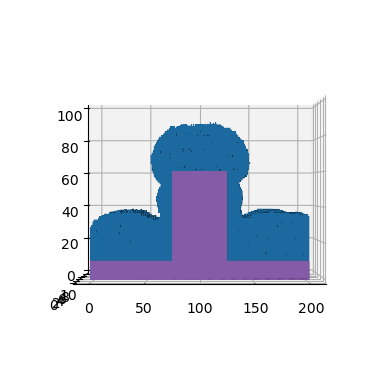

In [10]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[left_side:200-left_side, left_side:200-left_side, 0:height] = 10

openWidth = 95

substrate = np.array(film[:,openWidth:200-openWidth,  :] == 10)
indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(substrate)

ax.view_init(elev=0, azim=-90, roll=0)

In [12]:
etching[50, 100, :]

array([-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])

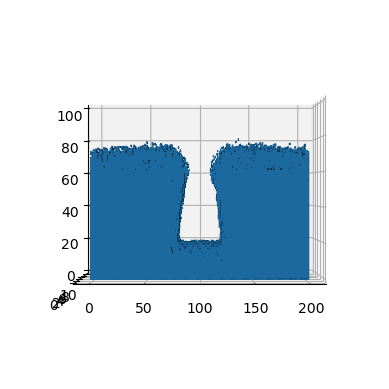

In [15]:
openWidth = 95

indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=-90, roll=0)

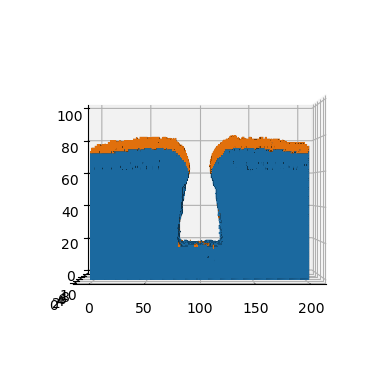

In [31]:
openWidth = 95

indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=-90, roll=0)

In [34]:
etching[90:110, 100, :30]

array([[  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,  -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,  -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,  -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,

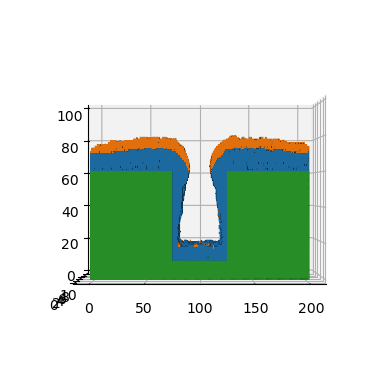

In [36]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 5 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 5
film[:, 0:left_side, 0:height] = 5
film[200-right_side:, :, 0:height] = 5
film[0:left_side, :, 0:height] = 5

openWidth = 95

substrate = np.array(film[:,openWidth:200-openWidth,  :] == 5)
indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == 10)
# in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
# in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
# in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
# ax.voxels(substrate)
ax.voxels(indice_wall)
# ax.voxels(in_depo2)
ax.voxels(in_depo)
# ax.voxels(in_depo2)
# ax.voxels(in_depo3)
# ax.voxels(in_depo4)
ax.voxels(substrate)
ax.view_init(elev=0, azim=-90, roll=0)

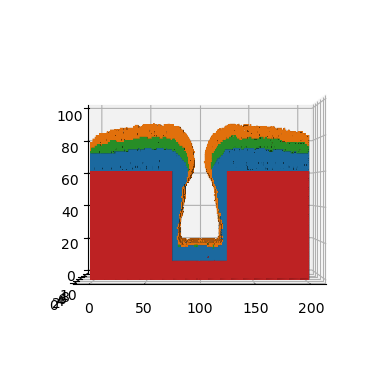

In [35]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 5 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 5
film[:, 0:left_side, 0:height] = 5
film[200-right_side:, :, 0:height] = 5
film[0:left_side, :, 0:height] = 5

openWidth = 95

substrate = np.array(film[:,openWidth:200-openWidth,  :] == 5)
indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == 10)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
# in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
# in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
# ax.voxels(substrate)
ax.voxels(indice_wall)
ax.voxels(in_depo2)
ax.voxels(in_depo)
# ax.voxels(in_depo2)
# ax.voxels(in_depo3)
# ax.voxels(in_depo4)
ax.voxels(substrate)
ax.view_init(elev=0, azim=-90, roll=0)